This part of the notebook is devoted to the analysis of Bayesian optimization of one-dimensional functions from a file Functions.py. For this work is used library GPyOpt. You can install it from a terminal : pip install gpyopt. I consider Bayesian optimization for two cases: optimizing the function without noise and optimizing the same function, but with noise that is dependent from the coordinate. And then I compare the results.


In [497]:
%pylab inline  
import GPy
import GPyOpt

import  Functions
from Functions import *


Populating the interactive namespace from numpy and matplotlib


func:  michalewicz
without noise


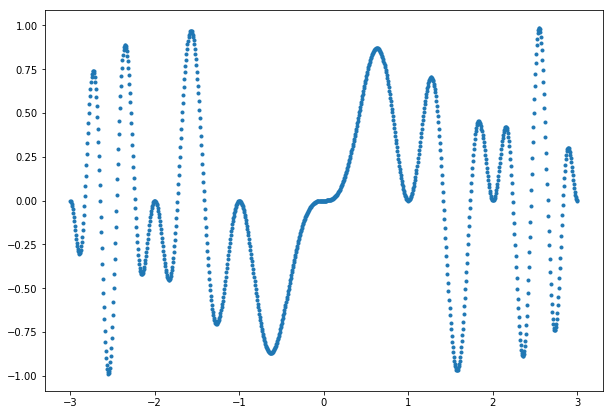

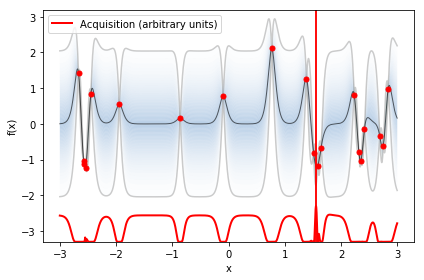

with noise


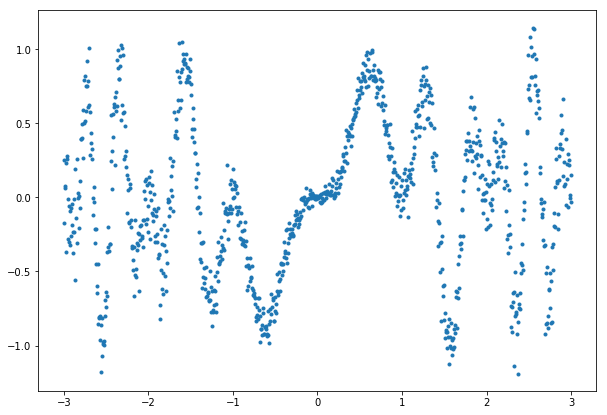

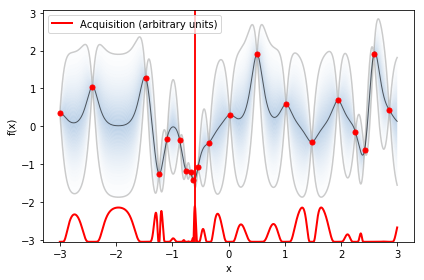

x_opt_without_noise =  [-2.54297929] , x_opt_with_noise =  [-0.62374881] , diff =  [1.91923048]
y_opt_without_noise =  -0.9854949638152476 , y_opt_with_noise =  -0.8516548520038405 , diff =  0.1338401118114071
func:  ackley1
without noise


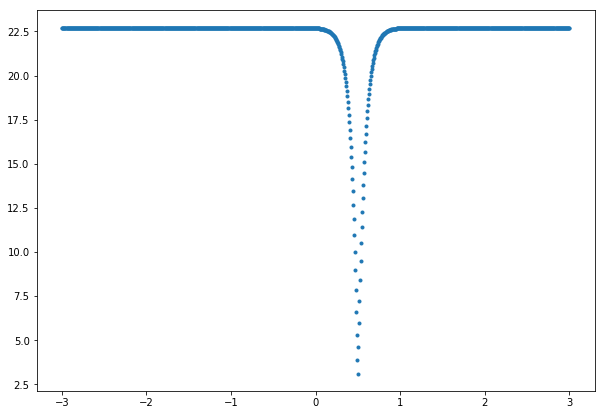

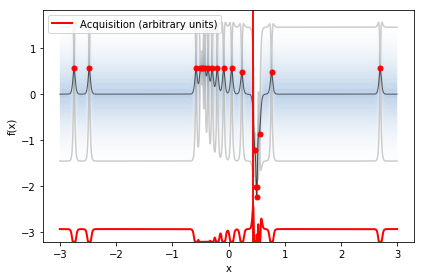

with noise


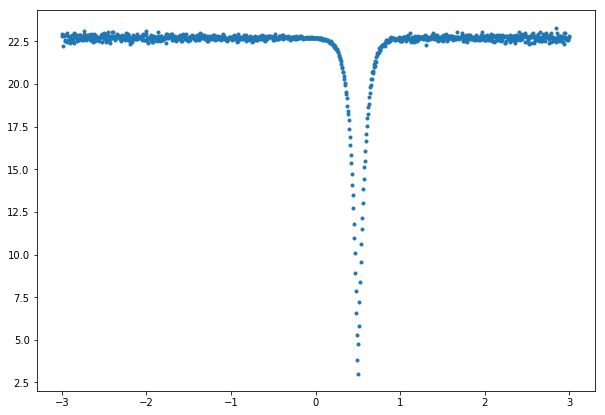

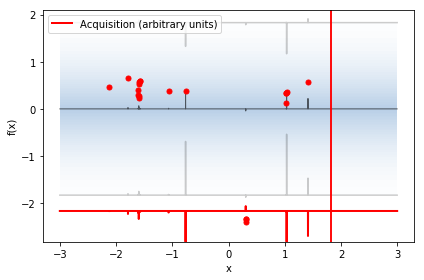

x_opt_without_noise =  [0.4997888] , x_opt_with_noise =  [0.30569962] , diff =  [0.19408918]
y_opt_without_noise =  2.7735708172054925 , y_opt_with_noise =  21.012990692409016 , diff =  18.239419875203524
func:  gsobol
without noise


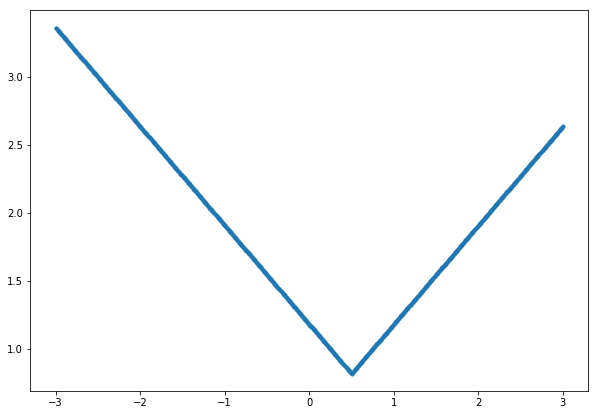

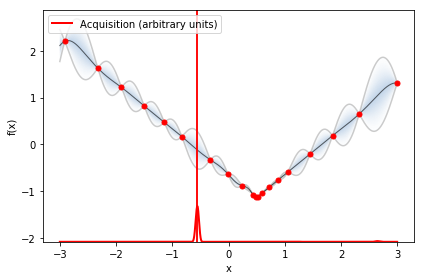

with noise


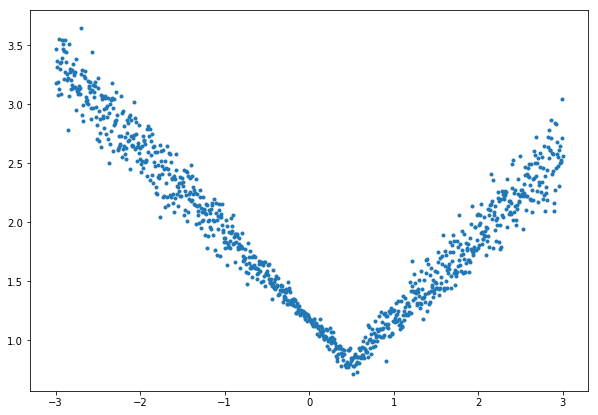

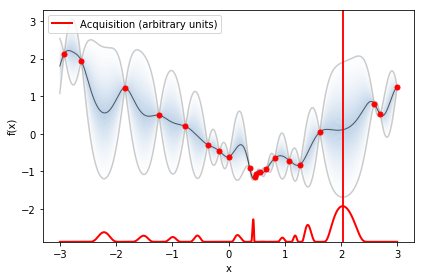

x_opt_without_noise =  [0.49259618] , x_opt_with_noise =  [0.46199414] , diff =  [0.03060205]
y_opt_without_noise =  0.8235664113776265 , y_opt_with_noise =  0.732378620379012 , diff =  0.09118779099861452
func:  michalewicz5
without noise


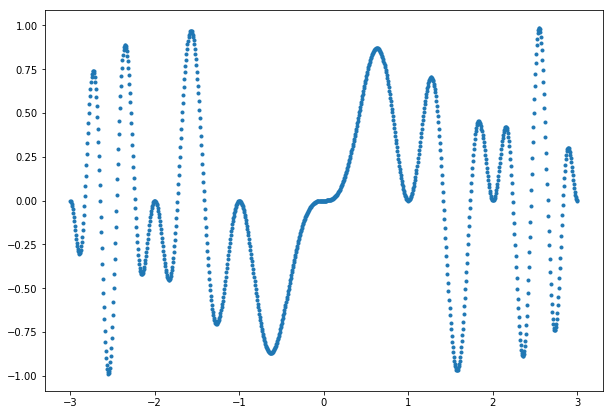

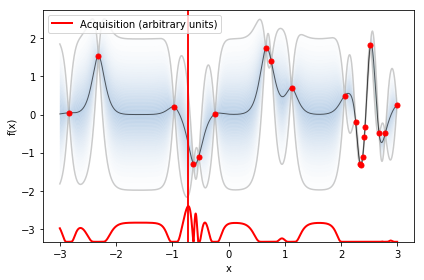

with noise


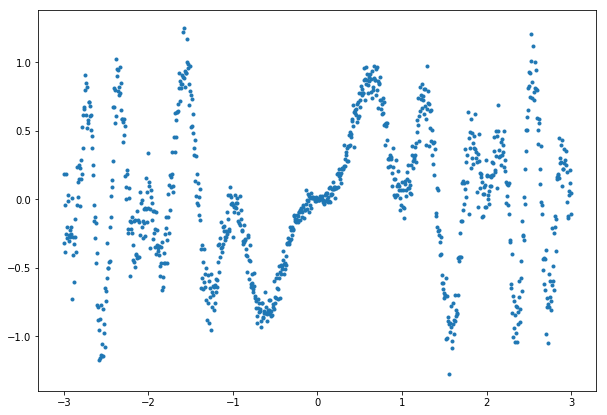

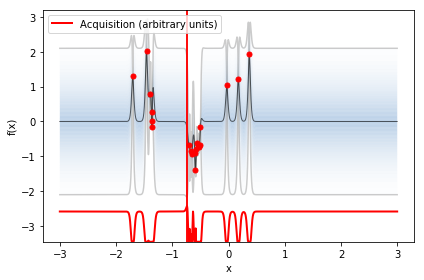

x_opt_without_noise =  [2.35524004] , x_opt_with_noise =  [-0.58851174] , diff =  [2.94375178]
y_opt_without_noise =  -0.8885191353005137 , y_opt_with_noise =  -1.0744958330270322 , diff =  0.18597669772651848
func:  sqmichalewicz5
without noise


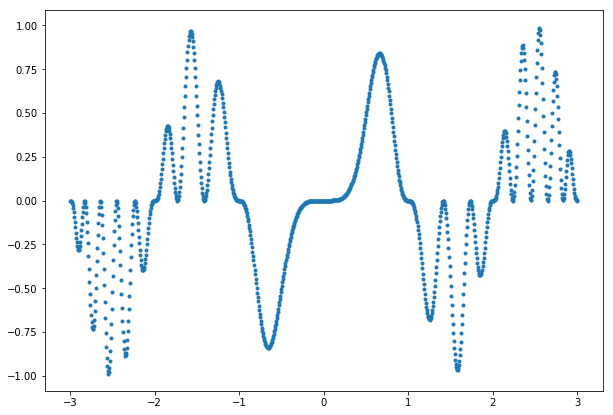

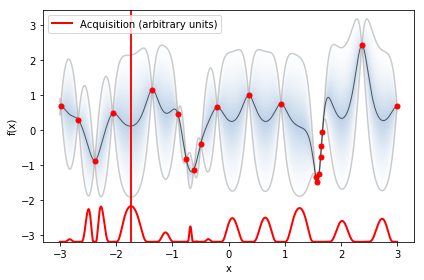

with noise


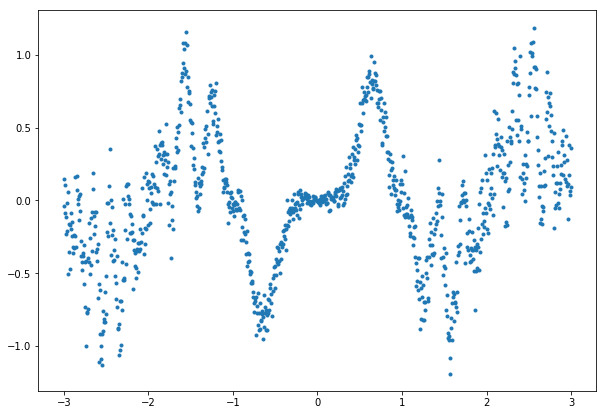

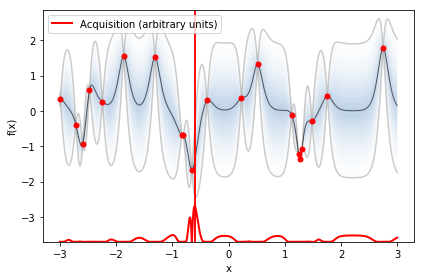

x_opt_without_noise =  [1.57906064] , x_opt_with_noise =  [-0.65219792] , diff =  [2.23125856]
y_opt_without_noise =  -0.9689002736956794 , y_opt_with_noise =  -0.9458276708952978 , diff =  0.023072602800381592
func:  rosenbrock5
without noise


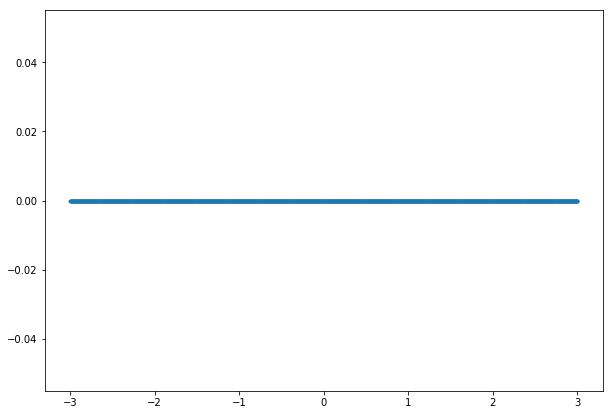

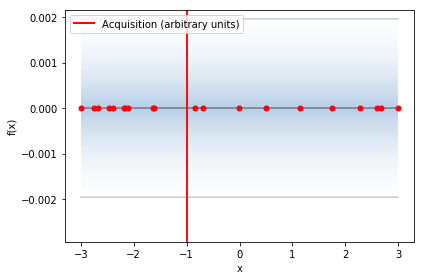

with noise


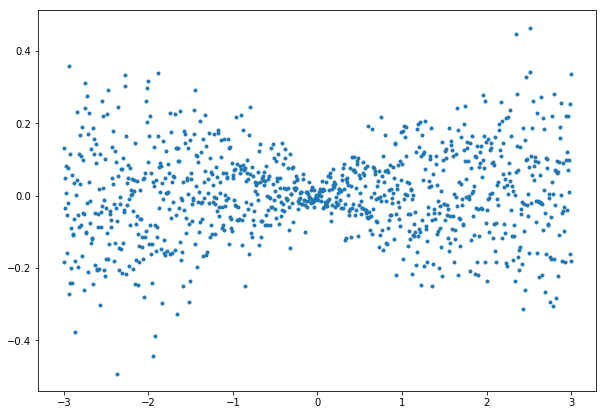

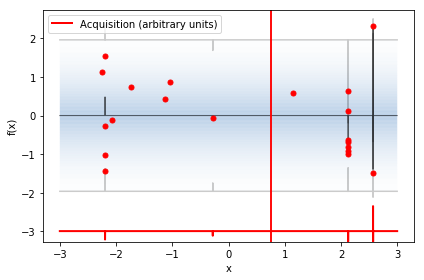

x_opt_without_noise =  [0.50095442] , x_opt_with_noise =  [2.57001164] , diff =  [2.06905722]
y_opt_without_noise =  0.0 , y_opt_with_noise =  -0.23357576146521783 , diff =  0.23357576146521783


In [504]:
#list of one-dimensional functions from Functions.py
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'rosenbrock5']

#required set of constants
N = 1000
X = np.linspace(-3, 3, N).reshape (- 1, 1)

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-3,3)}]  # problem constraints 

max_iter = 15 # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


for name in function_names:
    #first function - without noise    
    def f(X):
        return functionDoESpecial (X, name)
    print "func: ", name
    y = f(X)
    print 'without noise'
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')

    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_without_noise.plot_acquisition()


    
    
    #second function - with noise   
    def f(X):
        # target function  + heteroscadastic noise
        return functionDoESpecial (X, name) + \
        0.1 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(X.reshape (-1, )), 1)[0]
    
 
    y = f(X)
    print 'with noise'
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')
    
    

    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_with_noise.plot_acquisition()
    
    
    #compare results
    diff_x = np.abs (bayes_opt_without_noise.x_opt - bayes_opt_with_noise.x_opt)
    diff_y = np.abs (bayes_opt_without_noise.fx_opt - bayes_opt_with_noise.fx_opt)
    print "x_opt_without_noise = ", bayes_opt_without_noise.x_opt, ", x_opt_with_noise = ", bayes_opt_with_noise.x_opt, ", diff = ", diff_x
    print "y_opt_without_noise = ", bayes_opt_without_noise.fx_opt, ", y_opt_with_noise = ", bayes_opt_with_noise.fx_opt, ", diff = ", diff_y
       